In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import RandomFourierFeatures

import time
import os

In [2]:

# GPU 디바이스 확인
physical_devices = tf.config.list_physical_devices('GPU')

if len(physical_devices) > 0:
    print("GPU가 사용 가능합니다.")
    # GPU 메모리 동적 할당 설정
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("GPU를 찾을 수 없습니다.")


GPU를 찾을 수 없습니다.


In [3]:
def imgToArray(path_dir):
    path_dir = path_dir
    file_list = os.listdir(path_dir)

    data_X = []
    data_y = []
    chk = False
    print("Get data from", path_dir)
    for label, file in enumerate(file_list):
        if file == '.DS_Store':
            chk = True
            continue
        if label % 10 == 0:
            print("Now", label, "folders are converted.")
        path_dir2 = path_dir + '/' + file
        file_name_list = os.listdir(path_dir2)
        for file2 in file_name_list:
            if file2 == '.DS_Store':
                continue
            image = Image.open(path_dir2 + '/' + file2)
            val = np.array(image)
            data_X.append(val)
            if chk == True:
                data_y.append(label - 1)
            else:
                data_y.append(label)

    return np.array(data_X), np.array(data_y)

In [4]:
# 오디오 파일이 저장된 디렉토리 경로
audio_ok = "D:\\Dataset\\#1_Dataset_장비이상 조기탐지 AI 데이터셋#1\\data\\FAN_sound_OK"
audio_er = "D:\\Dataset\\#1_Dataset_장비이상 조기탐지 AI 데이터셋#1\\data\\FAN_sound_error"

# 저장할 Mel 스펙트로그램 이미지 파일의 디렉토리 경로
output_ok = "C:\\Users\\user\\Desktop\\test\\Define\\Define_1_2\\okMel"
output_er = "C:\\Users\\user\\Desktop\\test\\Define\\Define_1_2\\mel_spectrograms"

# 디렉토리가 없으면 생성
os.makedirs(output_ok, exist_ok=True)
os.makedirs(output_er, exist_ok=True)

# 오디오 파일들의 리스트
audio_files_ok = os.listdir(audio_ok)
audio_files_er = os.listdir(audio_er)

# # 각 오디오 파일에 대해 Mel 스펙트로그램을 계산하고 이미지로 저장
# for audio_file in audio_files_ok:
#     audio_path = os.path.join(audio_ok, audio_file)
#     y, sr = librosa.load(audio_path)

#     # Mel 스펙트로그램 계산
#     mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

#     # Mel 스펙트로그램을 이미지로 변환
#     mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
#     mel_spectrogram_db_image = (mel_spectrogram_db - mel_spectrogram_db.min()) / (mel_spectrogram_db.max() - mel_spectrogram_db.min())  # 0~1로 스케일 조정

#     # 이미지 파일로 저장
#     output_file_path = os.path.join(output_ok, os.path.splitext(audio_file)[0] + ".png")
#     plt.imsave(output_file_path, mel_spectrogram_db_image, cmap='viridis')
    
#     # 각 오디오 파일에 대해 Mel 스펙트로그램을 계산하고 이미지로 저장
# for audio_file in audio_files_er:
#     audio_path = os.path.join(audio_er, audio_file)
#     y, sr = librosa.load(audio_path)

#     # Reverse Augmentation
#     reversed_y = reverse_sound(y)

#     # Minus Augmentation
#     minus_y = minus_sound(y)
    
#     #White Noise Augmentation
#     addwn_y = adding_white_noise(y)
    
#     #Shifting Augmentation
#     shift_y = shifting_sound(y)
    
#     augmentations = [y, reversed_y, minus_y, addwn_y, shift_y]

#     for augmentation_index, augmented_y in enumerate(augmentations):
#         mel_spectrogram = librosa.feature.melspectrogram(y=augmented_y, sr=sr)

#         mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
#         mel_spectrogram_db_image = (mel_spectrogram_db - mel_spectrogram_db.min()) / (mel_spectrogram_db.max() - mel_spectrogram_db.min())  # 0~1로 스케일 조정

#         output_file_path = os.path.join(output_er, os.path.splitext(audio_file)[0] + f"_augmentation_{augmentation_index}.png")
#         plt.imsave(output_file_path, mel_spectrogram_db_image, cmap='viridis')

In [5]:
output_ok = "C:\\Users\\user\\Desktop\\test\\Define\\Define_1_2\\mfcc_ok"
output_er = "C:\\Users\\user\\Desktop\\test\\Define\\Define_1_2\\mfcc_er"

x_ok_label = []
x_er_label = []

ok_image_paths = [os.path.join(output_ok, filename) for filename in os.listdir(output_ok) if filename.endswith(".png")]
er_image_paths = [os.path.join(output_er, filename) for filename in os.listdir(output_er) if filename.endswith(".png")]


for image_path in ok_image_paths:
 
    image = Image.open(image_path)

    image_array = np.array(image)
    x_ok_label.append(image_array)


for image_path in er_image_paths:

    image = Image.open(image_path)
    
    image_array = np.array(image)
    x_er_label.append(image_array)

x_ok_label = np.array(x_ok_label)
x_er_label = np.array(x_er_label)

In [6]:
train_num_ok = 136
train_num_er = 122
test_num_ok = 34
test_num_er = 30

# 1
x_train = np.concatenate([x_ok_label[test_num_ok:], x_er_label[test_num_er:]], axis=0)
y_train = np.concatenate([np.zeros(train_num_ok), np.ones(train_num_er)], axis=0)
x_test = np.concatenate([x_ok_label[:test_num_ok], x_er_label[:test_num_er]], axis=0)
y_test = np.concatenate([np.zeros(test_num_ok), np.ones(test_num_er)], axis=0)

# # 2
# x_train = np.concatenate([x_ok_label[:test_num_ok],x_ok_label[2*test_num_ok:], x_er_label[:test_num_er], x_er_label[2*test_num_er:]], axis=0)
# y_train = np.concatenate([np.zeros(train_num_ok), np.ones(train_num_er)], axis=0)
# x_test = np.concatenate([x_ok_label[test_num_ok:2*test_num_ok], x_er_label[test_num_er:2*test_num_er]], axis=0)
# y_test = np.concatenate([np.zeros(test_num_ok), np.ones(test_num_er)], axis=0)

# # 3
# x_train = np.concatenate([x_ok_label[:2*test_num_ok],x_ok_label[3*test_num_ok:], x_er_label[:2*test_num_er], x_er_label[3*test_num_er:]], axis=0)
# y_train = np.concatenate([np.zeros(train_num_ok), np.ones(train_num_er)], axis=0)
# x_test = np.concatenate([x_ok_label[2*test_num_ok:3*test_num_ok], x_er_label[2*test_num_er:3*test_num_er]], axis=0)
# y_test = np.concatenate([np.zeros(test_num_ok), np.ones(test_num_er)], axis=0)

# # 4
# x_train = np.concatenate([x_ok_label[:3*test_num_ok],x_ok_label[4*test_num_ok:], x_er_label[:3*test_num_er], x_er_label[4*test_num_er:]], axis=0)
# y_train = np.concatenate([np.zeros(train_num_ok), np.ones(train_num_er)], axis=0)
# x_test = np.concatenate([x_ok_label[3*test_num_ok:4*test_num_ok], x_er_label[3*test_num_er:4*test_num_er]], axis=0)
# y_test = np.concatenate([np.zeros(test_num_ok), np.ones(test_num_er)], axis=0)

# # 5
# x_train = np.concatenate([x_ok_label[:train_num_ok], x_er_label[:train_num_er]], axis=0)
# y_train = np.concatenate([np.zeros(train_num_ok), np.ones(train_num_er)], axis=0)
# x_test = np.concatenate([x_ok_label[train_num_ok:], x_er_label[train_num_er:]], axis=0)
# y_test = np.concatenate([np.zeros(test_num_ok), np.ones(test_num_er)], axis=0)

print(x_train.shape, x_test.shape)
print(y_test)

x_valid = x_test
y_valid = y_test

(252, 400, 1000, 4) (64, 400, 1000, 4)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [7]:
train_num = len(x_train)
valid_num = len(x_valid)
test_num = len(x_test)
train_indices = np.arange(train_num)
test_indices = np.arange(test_num)

np.random.shuffle(train_indices)
np.random.shuffle(test_indices)

x_train = x_train[train_indices]
y_train = y_train[train_indices]
x_test = x_test[test_indices]
y_test = y_test[test_indices]

num_classes = 2

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(x_train.shape)

(252, 400, 1000, 4)


In [8]:
input_shape = (400,1000,4)

model = keras.Sequential(
    [
        keras.Input(shape=(400, 1000, 4)),
        layers.Flatten(),
        RandomFourierFeatures(
            output_dim=128, scale=0.1, kernel_initializer="gaussian"
        ),
        layers.Dense(units=2),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1600000)           0         
                                                                 
 random_fourier_features (Ra  (None, 128)              204800129 
 ndomFourierFeatures)                                            
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 204,800,387
Trainable params: 258
Non-trainable params: 204,800,129
_________________________________________________________________


In [9]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.hinge,
    metrics=[keras.metrics.CategoricalAccuracy(name="acc")],
)


history = model.fit(x_train, y_train, epochs=100, batch_size=16, validation_split=0.2)


Epoch 1/100
13/13 [==============================] - 2s 171ms/step - loss: 0.9908 - acc: 0.5970 - val_loss: 0.8836 - val_acc: 0.6667
Epoch 2/100
13/13 [==============================] - 2s 156ms/step - loss: 0.9375 - acc: 0.6070 - val_loss: 0.8601 - val_acc: 0.6471
Epoch 3/100
13/13 [==============================] - 2s 159ms/step - loss: 0.8834 - acc: 0.6318 - val_loss: 0.8358 - val_acc: 0.6471
Epoch 4/100
13/13 [==============================] - 2s 154ms/step - loss: 0.8018 - acc: 0.6567 - val_loss: 0.8104 - val_acc: 0.6667
Epoch 5/100
13/13 [==============================] - 2s 154ms/step - loss: 0.7809 - acc: 0.6716 - val_loss: 0.7877 - val_acc: 0.6863
Epoch 6/100
13/13 [==============================] - 2s 154ms/step - loss: 0.7394 - acc: 0.7164 - val_loss: 0.7680 - val_acc: 0.7059
Epoch 7/100
13/13 [==============================] - 2s 159ms/step - loss: 0.6947 - acc: 0.7164 - val_loss: 0.7488 - val_acc: 0.7059
Epoch 8/100
13/13 [==============================] - 2s 157ms/step - 

In [10]:
start_time = time.time()
test_loss, test_accuracy = model.evaluate(x_test, y_test)
end_time = time.time()
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")
model.save('C:\\Users\\user\\Desktop\\TinyML\\model_svm.h5')

2/2 [==============================] - 0s 133ms/step - loss: 0.5449 - acc: 0.7656
Test Loss: 0.5448809862136841, Test Accuracy: 0.765625
Training time: 0.32828330993652344 seconds


2/2 [==============================] - 0s 141ms/step
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 

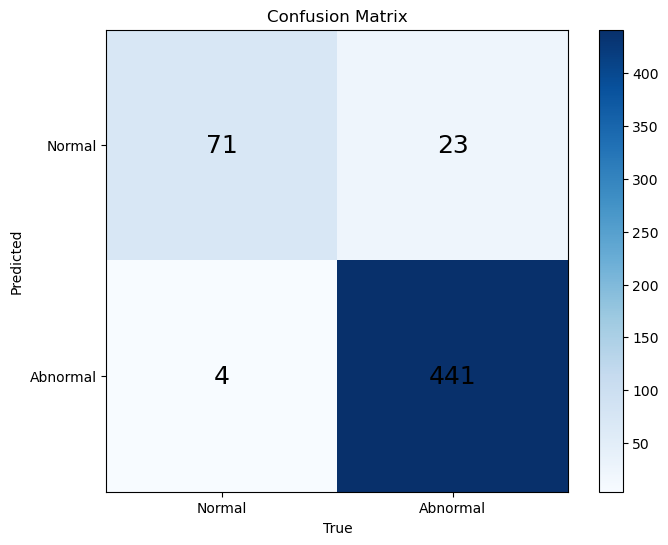

In [11]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)  

print(y_test)

error_count = 0

true_positive = 39
true_negative = 418
false_positive = 16
false_negative = 2

for i in range(64):
    if (y_test[i][0]==1.0)and(y_pred[i][0]==True):
        true_positive += 1
    elif (y_test[i][0]==0)and(y_pred[i][0]==True):
        false_positive += 1
    elif (y_test[i][0]==1.0)and(y_pred[i][0]==False):
        false_negative += 1
    elif (y_test[i][0]==0)and(y_pred[i][0]==False):
        true_negative += 1
    else:
        error_count += 1


print(y_test)        
# if true_positive == 0 :
#     true_positive = 1
    
# if false_positive == 0 :
#     false_positive = 1
    
# if true_negative == 0 :
#     true_negative = 1
    
# if false_negative == 0 :
#     false_negative = 1

total_positive = true_positive+false_negative
total_negative = true_negative+false_positive

total = total_positive+total_negative ## 전체

print(true_positive, false_positive, false_negative, true_negative)
 

# confusion_matrix = np.array([[round(true_positive/total_positive,6), round(false_positive/total_negative,6)],
#                              [round(false_negative/total_positive,6), round(true_negative/total_negative,6)]]) #TP ,FP , FN, TN

confusion_matrix = np.array([[true_positive,false_positive],
                             [false_negative,true_negative]]) 



Accuracy = (true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
print(Accuracy)

print(confusion_matrix)

plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Normal', 'Abnormal'])
plt.yticks([0, 1], ['Normal', 'Abnormal'])
plt.xlabel('True')
plt.ylabel('Predicted')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center', color='black', fontsize=18)
plt.show()

acc
0.9499
sen
0.9467
spe
0.9504
prc
0.7553
Confusion Matrix:
[[0.9467 0.0496]
 [0.0533 0.9504]]


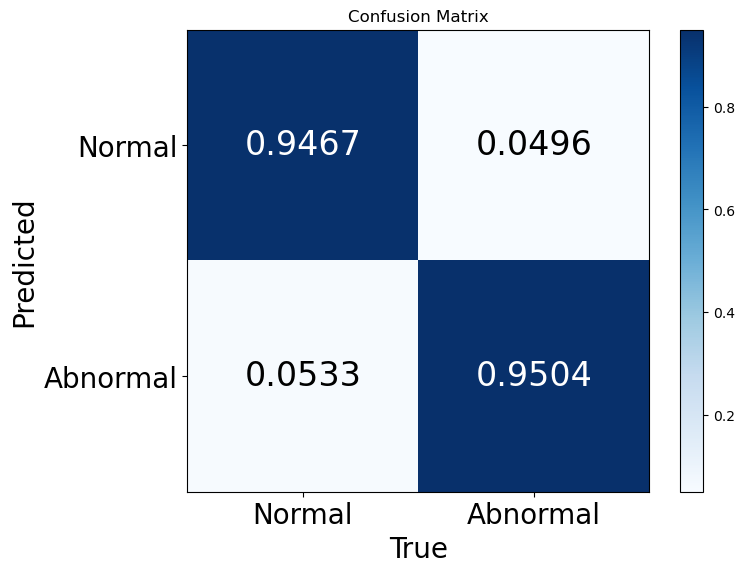

In [12]:
         
total_positive = true_positive+false_negative #수정
total_negative = true_negative+false_positive #수정

print("acc")
print(round((true_positive+true_negative)/(true_positive+true_negative+false_positive+false_negative),4))
print("sen")
print(round(true_positive/(true_positive+false_negative),4))
print("spe")
print(round(true_negative/(true_negative+false_positive),4))
print("prc")
print(round(true_positive/(true_positive+false_positive),4))
 

confusion_matrix = np.array([[round(true_positive/total_positive,4), round(false_positive/total_negative,4)],
                             [round(false_negative/total_positive,4), round(true_negative/total_negative,4)]])

print("Confusion Matrix:")
print(confusion_matrix)

plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Normal', 'Abnormal'], fontsize=20)
plt.yticks([0, 1], ['Normal', 'Abnormal'], fontsize=20)
plt.xlabel('True', fontsize=20)
plt.ylabel('Predicted', fontsize=20)
plt.text(0, 0, str(confusion_matrix[0, 0]), ha='center', va='center', color='white', fontsize=24)
plt.text(1, 0, str(confusion_matrix[0, 1]), ha='center', va='center', color='black', fontsize=24)
plt.text(0, 1, str(confusion_matrix[1, 0]), ha='center', va='center', color='black', fontsize=24)
plt.text(1, 1, str(confusion_matrix[1, 1]), ha='center', va='center', color='white', fontsize=24)
plt.show()

In [13]:
weights = model.get_weights()
print(weights)

[array([0.1], dtype=float32), array([[-1.2809731 , -0.60658455,  0.30054763, ..., -0.10595283,
        -0.7374466 ,  0.12231302],
       [-0.5117072 , -1.5972782 ,  0.04428468, ...,  1.2374119 ,
         1.155154  ,  0.40634596],
       [-0.5712936 , -0.44205338, -1.1292907 , ..., -1.3284972 ,
         0.6481364 , -1.2565614 ],
       ...,
       [-1.2167426 ,  0.6241265 , -0.23247512, ..., -0.03103645,
        -0.23592046, -0.08119895],
       [ 0.2552088 ,  1.6719316 , -0.0034452 , ...,  0.09676395,
        -0.6137332 ,  0.40361857],
       [ 1.1069765 , -1.1215825 ,  0.2697207 , ...,  0.78866553,
         0.7231245 ,  0.6022275 ]], dtype=float32), array([2.5632265 , 4.3347864 , 1.8905236 , 1.9547807 , 3.8348126 ,
       5.0044403 , 1.9915588 , 4.917729  , 4.3561916 , 1.7883775 ,
       2.2989466 , 3.1608896 , 0.7966551 , 2.8088179 , 3.5674176 ,
       5.534819  , 5.7323585 , 4.1960425 , 4.854003  , 3.215706  ,
       2.0334175 , 2.5320182 , 4.1534367 , 4.174337  , 4.110545  ,
      

In [14]:
import pandas as pd
import numpy as np

# weights는 model.get_weights()로 얻은 가중치 리스트입니다.
weights = model.get_weights()
# print(weights)

# 모든 가중치를 하나의 1차원 리스트로 펼침
flattened_weights = np.concatenate([w.flatten() for w in weights])

# 하나의 DataFrame으로 변환
weights_df = pd.DataFrame(flattened_weights, columns=['Weight'])
# Panda display max 출력해보기 
# # CSV 파일로 저장
# weights_df.to_csv('model_weights.csv', index=False)
print(weights_df.shape)

(204800387, 1)
